In [2]:
# default_exp box_segment

In [3]:
#export
import requests
from PIL import Image
from io import BytesIO

from dab.boxes import *
from dab.segment import *
from dab.paths import *

/home/dima/DAB-DETR/STEGO/src/train_segmentation.py:386: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path="configs", config_name="train_config.yml")


Since no pretrained weights have been provided, we load the reference pretrained DINO weights.


/home/dima/anaconda3/envs/dab/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (UnsupervisedMetrics). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)


In [4]:
# img_url ="https://image.shutterstock.com/z/stock-photo-chicken-fillet-with-salad-healthy-food-keto-diet-diet-lunch-concept-top-view-on-white-1721943142.jpg"
# response = requests.get(img_url)
# img = Image.open(BytesIO(response.content))
# img = get_food_segment(img)
# boxes = get_boxes(img,thershold=0.005)

In [21]:
#export
def save_segmented_boxes(url,thershold=0.35):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img,mask = get_food_segment(img)
    boxes = get_boxes(img,thershold=thershold)
    photo_id = url.split('/')[-1]
    for id, box in enumerate(boxes): img.crop(box).save(fragment_reference_images_path/f'{photo_id}_{id}.jpg')
    return boxes,mask.tolist()

In [6]:
def crop_image_to_square(img):
    height = img.size[1]//2*2
    left  = int((img.size[0]-height)/2)
    right =      img.size[0]-left
    return img.crop((left,0,right,height))

In [7]:
url = 'https://image.shutterstock.com/z/stock-photo-club-sandwich-and-french-fries-on-a-light-wooden-board-next-to-the-potatoes-is-a-cup-of-ketchup-1147730354.jpg'

In [8]:
thershold = 0.005

In [9]:
boxes,mask = save_segmented_boxes(url,thershold=0.0035)

/home/dima/anaconda3/envs/dab/lib/python3.9/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
/home/dima/anaconda3/envs/dab/lib/python3.9/site-packages/torch/nn/functional.py:3704: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/dima/DAB-DETR/models/dab_deformable_detr/position_encoding.py:53: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature ** (2 * (di

In [10]:
mask

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [11]:
boxes

[(90.79804992675781, 446.2300720214844, 373.6359405517578, 767.2989807128906),
 (655.236328125, 319.041259765625, 940.004150390625, 612.4403991699219),
 (360.0350646972656, 490.646240234375, 670.6058044433594, 812.1244812011719),
 (625.1116333007812, 560.702880859375, 909.8849487304688, 860.9674987792969),
 (626.5371704101562, 560.7298583984375, 909.4311218261719, 861.2561340332031),
 (90.04364013671875, 306.8140563964844, 945.4723510742188, 852.7943420410156),
 (362.0994567871094, 488.064208984375, 910.4413146972656, 861.2955322265625),
 (362.0870361328125, 490.29412841796875, 666.9299011230469, 812.8517150878906),
 (90.79804992675781, 446.2300720214844, 373.6359405517578, 767.2989807128906),
 (91.15043640136719, 445.8284912109375, 372.3730010986328, 767.8852844238281),
 (661.0191650390625, 319.36712646484375, 938.3693237304688, 609.8916320800781),
 (1.70709228515625, 6.8924560546875, 1095.6940307617188, 1089.1956787109375),
 (626.5371704101562, 560.7298583984375, 909.4311218261719, 8

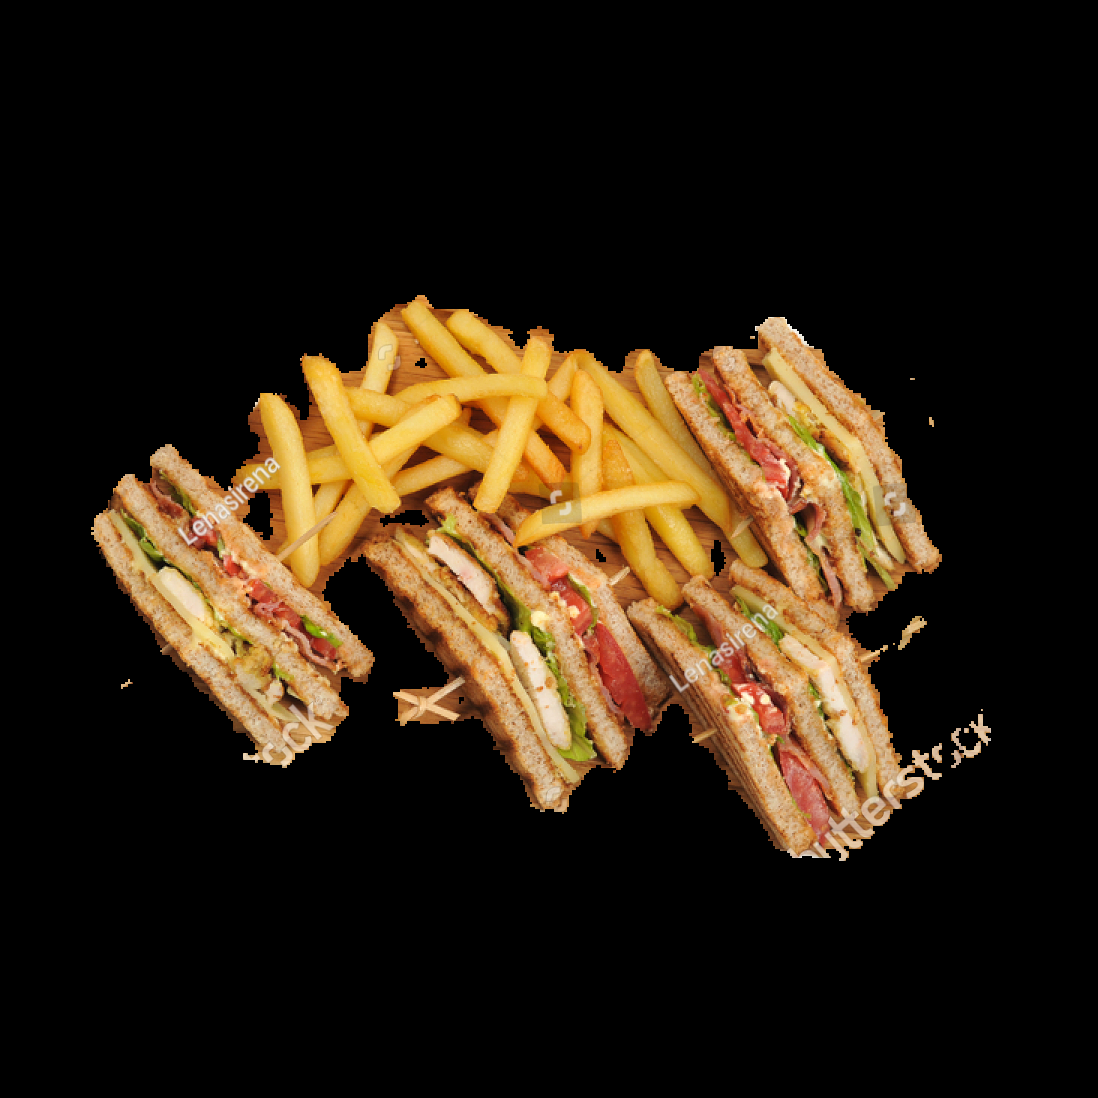

In [24]:
segmimg

In [25]:
boxes

[(89.89265441894531, 445.7992248535156, 374.85179138183594, 767.0046081542969),
 (349.7196044921875, 492.57000732421875, 671.4856262207031, 811.8946838378906),
 (658.7532958984375, 318.57061767578125, 940.5537719726562, 612.0760498046875),
 (625.3154907226562, 560.5196533203125, 921.1412963867188, 859.4461669921875),
 (627.4105834960938, 559.6063232421875, 920.3042907714844, 860.9067993164062),
 (89.35406494140625, 307.2825622558594, 945.5778198242188, 849.9586486816406),
 (90.27018737792969, 445.66650390625, 373.2074737548828, 767.4737243652344),
 (89.89265441894531, 445.7992248535156, 374.85179138183594, 767.0046081542969),
 (345.8101806640625, 492.0047607421875, 664.5753784179688, 813.9747619628906),
 (329.576416015625, 489.49127197265625, 923.7276611328125, 860.2673034667969),
 (753.6498413085938, 319.68731689453125, 939.1359558105469, 589.5906372070312),
 (1.91015625, 7.291748046875, 1095.3446044921875, 1089.2088623046875),
 (658.1605834960938, 351.6999816894531, 867.3254241943359

: 

In [6]:
len(save_segmented_boxes(url,0.005))

/home/dima/anaconda3/envs/dab/lib/python3.9/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
/home/dima/anaconda3/envs/dab/lib/python3.9/site-packages/torch/nn/functional.py:3704: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/dima/DAB-DETR/models/dab_deformable_detr/position_encoding.py:53: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature ** (2 * (di

100

In [23]:
!nbdev_build_lib

Converted 00_paths.ipynb.
Converted 00_tools.ipynb.
Converted box_segment.ipynb.
Converted boxes.ipynb.
Converted food_segment.ipynb.
